In [57]:
import pandas as pd
import seaborn as sns
import math

In [58]:
df = pd.read_csv("data\Rport120.csv")
df['Data'] = df['Data'].astype('datetime64[ns]')

In [59]:
df.describe()

,Equal Weights,HRP,MV
count,150.000000,150.000000,150.000000
mean,1.146360,0.942268,0.828020
std,7.302012,5.697033,4.578809
min,-31.222129,-25.071928,-20.537534
25%,-2.520935,-1.989460,-1.771611
50%,0.581142,0.414066,0.660428
75%,4.946109,4.742772,4.226389
max,28.407488,17.969638,12.289214


In [60]:
df

,Data,Equal Weights,HRP,MV
0,2010-01-01,-2.547480,-2.551249,-1.398537
1,2010-02-01,0.033475,0.021188,-0.599230
2,2010-03-01,4.546539,2.392432,-0.531021
3,2010-04-01,-2.565052,-1.485060,1.602359
4,2010-05-01,-5.656136,-4.083659,-3.093820
...,...,...,...,...
145,2022-02-01,-2.031817,-1.088784,-0.822214
146,2022-03-01,5.703848,3.897143,3.901155
147,2022-04-01,-6.545801,-5.830961,-3.451624
148,2022-05-01,5.022972,2.717984,-0.098909


# Accumulated return

In [61]:
display(df['Equal Weights'].sum())
display(df['HRP'].sum())
display(df['MV'].sum())

171.95403248959113

141.3402349410317

124.20301836859413

In [62]:
sns.set(rc = {'figure.figsize':(30,8)})

# Returns by portfolio over the time

<AxesSubplot: xlabel='Data', ylabel='value'>

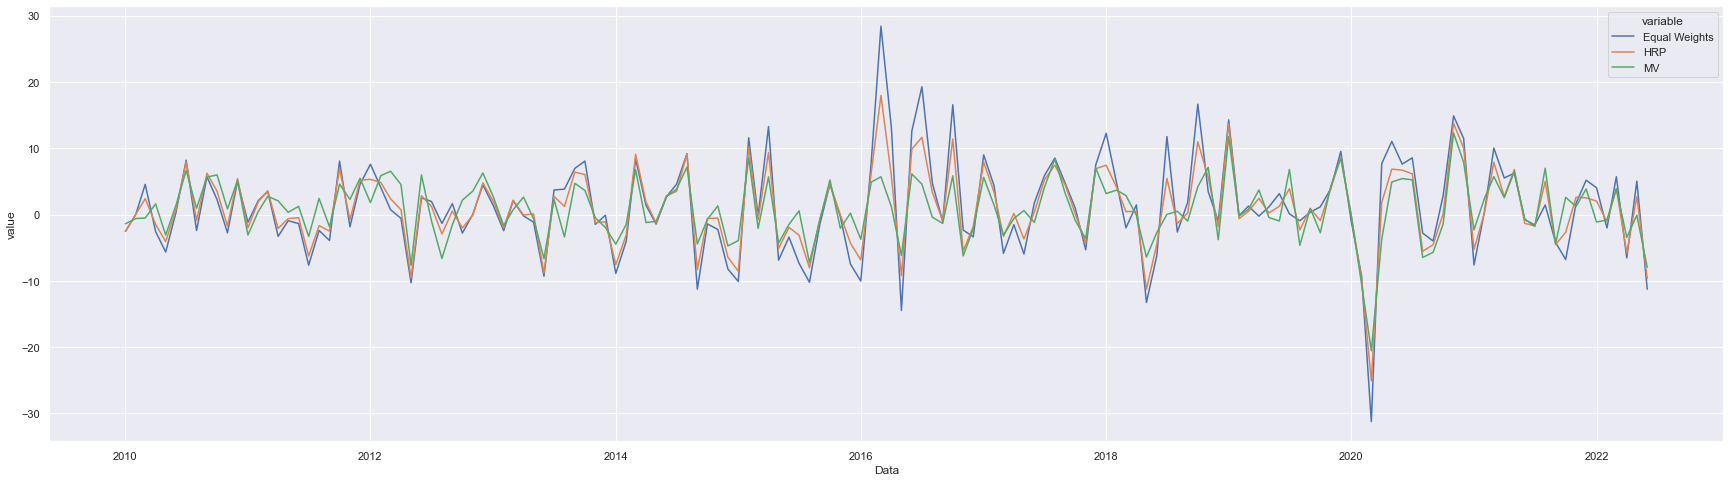

In [63]:
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(df, ['Data']))

### Pandemic Window

<AxesSubplot: xlabel='Data', ylabel='value'>

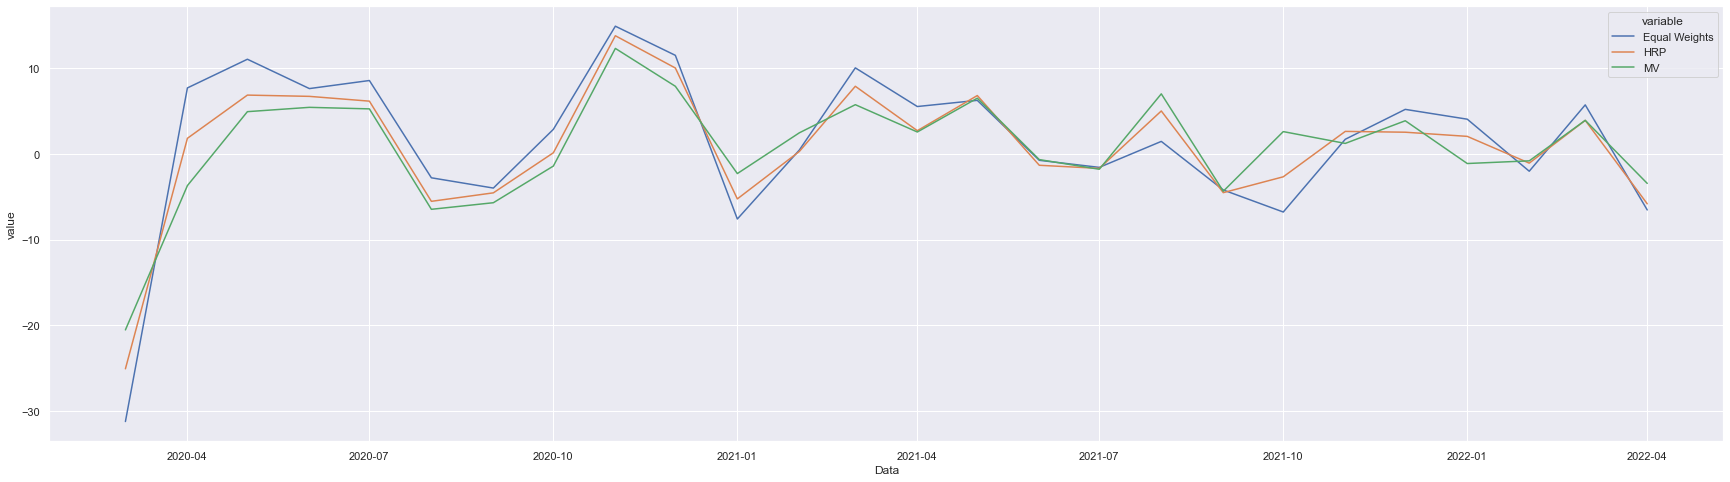

In [64]:
pandemic_df = df.loc[(df['Data'] >= '2020-03-01') & (df['Data'] < '2022-04-15')]
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(pandemic_df, ['Data']))


# Converting data to datetime

In [65]:
df['Ano'] = df['Data'].astype('datetime64[ns]')
df['Ano'] = df['Data'].dt.year.astype(int)

In [66]:
df_mean_by_year = df.groupby(['Ano'], as_index=False).mean()
df_median_by_year = df.groupby(['Ano'], as_index=False).median()
df_std_by_year = df.groupby(['Ano'], as_index=False).std()

# AV

In [67]:
def annualized_average_return(df, col):
  avg_return = df[col].mean()
  annualized_avg_return = 12 * avg_return

  return annualized_avg_return


In [68]:
av_df = pd.DataFrame(columns=['Portfolio', 'Annualized Average Return'])
columns = ['Equal Weights', 'HRP', 'MV']
for col in columns:
    avg_return = annualized_average_return(df, col)
    row = {'Portfolio': col, 'Annualized Average Return': avg_return}
    av_df = av_df.append(row, ignore_index=True)

av_df


C:\Users\felip\AppData\Local\Temp\ipykernel_22464\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)


,Portfolio,Annualized Average Return
0,Equal Weights,13.756323
1,HRP,11.307219
2,MV,9.936241


<AxesSubplot: xlabel='Ano', ylabel='value'>

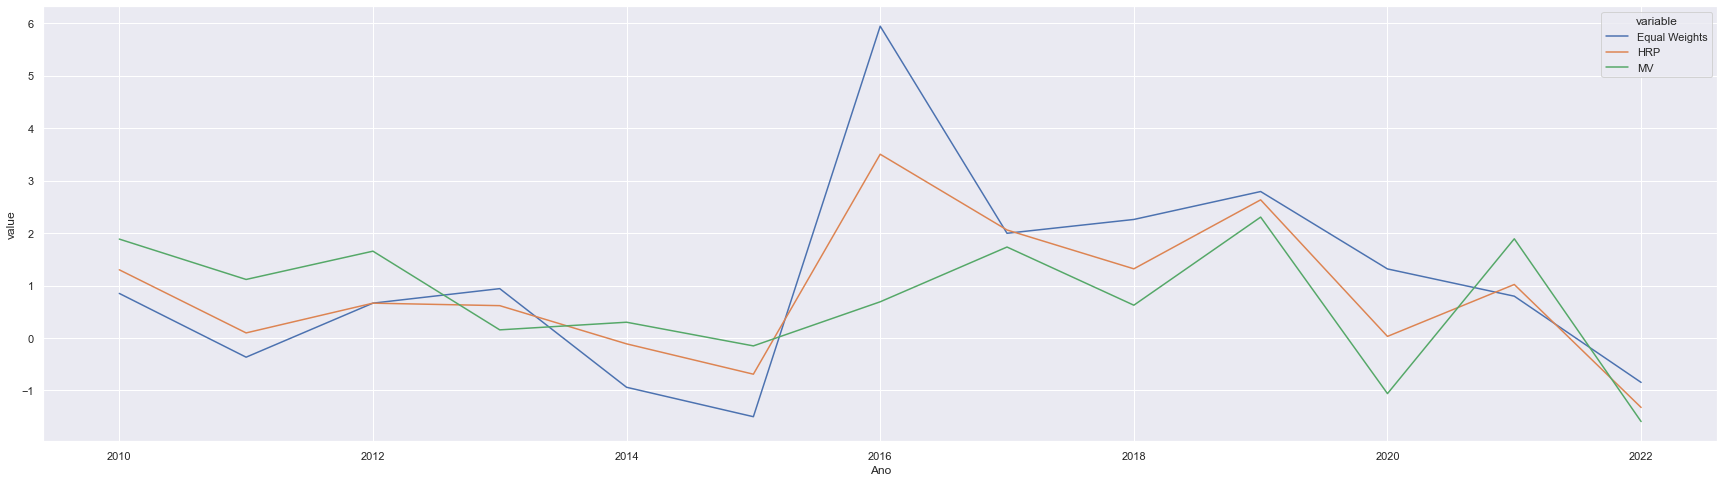

In [69]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_mean_by_year, ['Ano']))


# SD

In [70]:
def annualized_standard_deviation(df, col):
  std = df[col].std()
  annualized_std = math.sqrt(12) * std

  return annualized_std


In [71]:
sd_df = pd.DataFrame(columns=['Portfolio', 'Annualized Standard Deviation'])

for col in columns:
    std = annualized_standard_deviation(df, col)
    row = {'Portfolio': col, 'Annualized Standard Deviation': std}
    sd_df = sd_df.append(row, ignore_index=True)

sd_df


C:\Users\felip\AppData\Local\Temp\ipykernel_22464\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)


,Portfolio,Annualized Standard Deviation
0,Equal Weights,25.294912
1,HRP,19.735101
2,MV,15.861459


<AxesSubplot: xlabel='Ano', ylabel='value'>

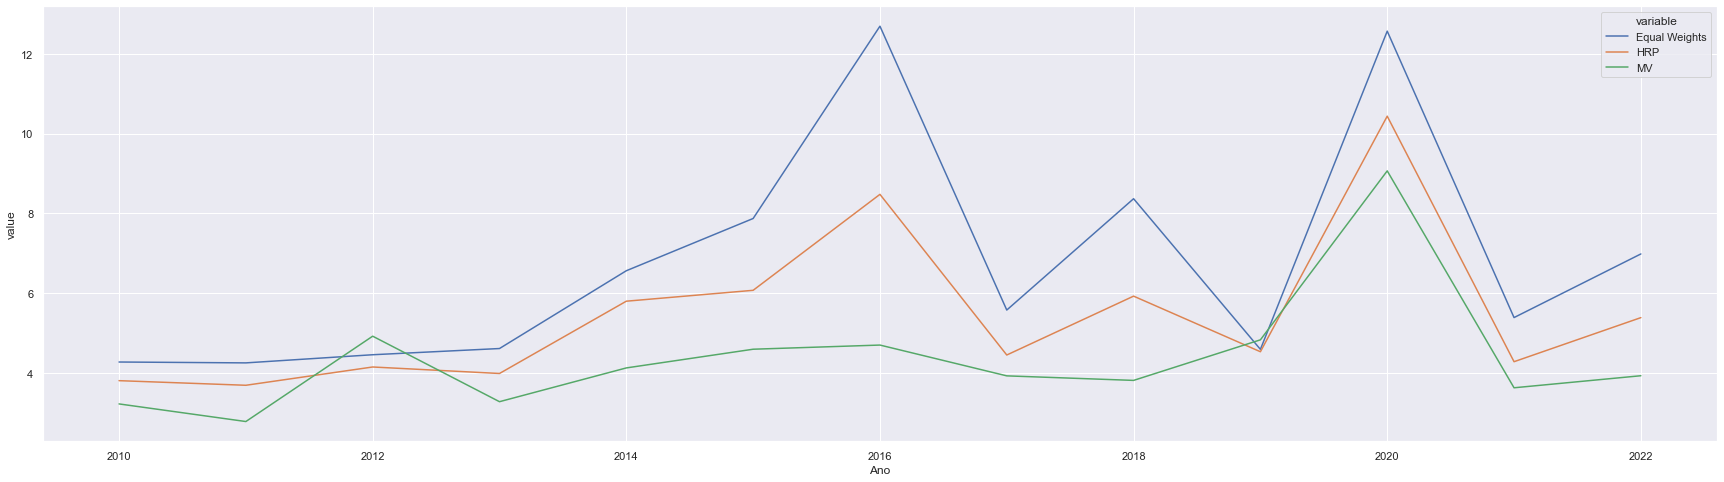

In [72]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))


# SR / ASR

In [73]:
def annualized_sharpe(df, col):
  df['excess_returns'] = df[col] - 0.005
  mean_excess_returns = df['excess_returns'].mean()
  std_excess_returns = df['excess_returns'].std()
  sharpe_ratio = mean_excess_returns / std_excess_returns
  annualized_sharpe = math.sqrt(12) * sharpe_ratio

  return annualized_sharpe


In [74]:
sr_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sharpe'])

for col in columns:
  sharpe = annualized_sharpe(df, col)
  row = {'Portfolio': col, 'Annualized Sharpe': sharpe}
  sr_df = sr_df.append(row, ignore_index=True)

sr_df

C:\Users\felip\AppData\Local\Temp\ipykernel_22464\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)


,Portfolio,Annualized Sharpe
0,Equal Weights,0.541466
1,HRP,0.569909
2,MV,0.622657


# SoR

In [75]:
def annualized_sortino(df, col, mar):
  df['excess_returns'] = df[col] - mar
  mean_excess_returns = df['excess_returns'].mean()
  std_negative_excess_returns = df[df['excess_returns'] < 0]['excess_returns'].std()
  sortino_ratio = mean_excess_returns / std_negative_excess_returns
  annualized_sortino = math.sqrt(12) * sortino_ratio

  return annualized_sortino


In [76]:
sortino_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sortino'])

mar = 0.005
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    sortino = annualized_sortino(df, col, mar)
    row = {'Portfolio': col, 'Annualized Sortino': sortino}
    sortino_df = sortino_df.append(row, ignore_index=True)

sortino_df


C:\Users\felip\AppData\Local\Temp\ipykernel_22464\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)


,Portfolio,Annualized Sortino
0,Equal Weights,0.811772
1,HRP,0.815390
2,MV,0.899474


# TO

In [77]:
def average_portfolio_turnover(df, col):
  df['weight_diff'] = (df[col] - df[col].shift()).abs()
  avg_turnover = df['weight_diff'].mean()

  return avg_turnover


In [78]:
turnover_df = pd.DataFrame(columns=['Portfolio', 'Average Turnover'])
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    turnover = average_portfolio_turnover(df, col)
    row = {'Portfolio': col, 'Average Turnover': turnover}
    turnover_df = turnover_df.append(row, ignore_index=True)
turnover_df


C:\Users\felip\AppData\Local\Temp\ipykernel_22464\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22464\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)


,Portfolio,Average Turnover
0,Equal Weights,7.300398
1,HRP,5.952772
2,MV,5.018038


# Metrics

In [79]:
metrics = pd.concat([av_df, sd_df['Annualized Standard Deviation'], sr_df['Annualized Sharpe'], sortino_df['Annualized Sortino'], turnover_df['Average Turnover']], axis=1)
metrics
metrics.to_excel("data\metrics_120_months.xlsx", index=False)